작성일 : 19/7/25  
목적 : Masked 되어있는 Card1-Card6 변수 파악 및 feature engineering에 적용할 아이디어 찾기

In [1]:
library(data.table)
library(ggplot2)
library(dplyr)
options(repr.plot.width = 5, repr.plot.height = 3)
options(scipen = 100)
library(ggpubr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: magrittr


In [2]:
tr <- fread("/Users/jeong/downloads/IEEE/input/train_transaction.csv")
te <- fread("/Users/jeong/downloads/IEEE/input/test_transaction.csv")

tr_id <- fread("/Users/jeong/downloads/IEEE/input/train_identity.csv")
te_id <- fread("/Users/jeong/downloads/IEEE/input/test_identity.csv")

### card1

[1] 13553

[1] 13244

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000    6019    9678    9899   14184   18396 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1001    6019    9803    9957   14276   18397 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


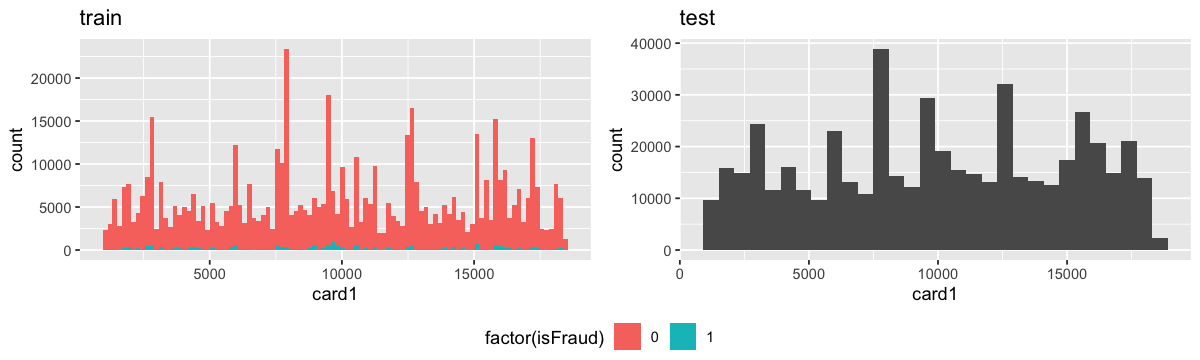

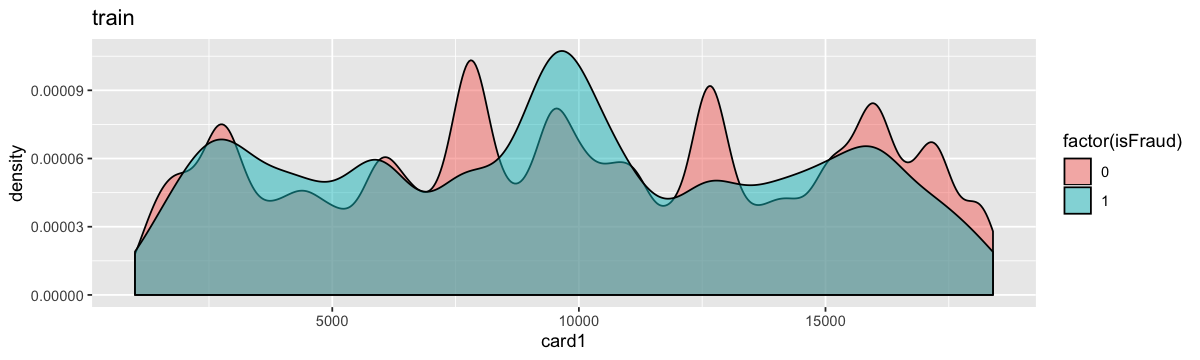

In [3]:
n_distinct(tr$card1)
n_distinct(te$card1)
summary(tr$card1)
summary(te$card1)

a1 <- ggplot(tr, aes(card1, fill = factor(isFraud))) + geom_histogram(bins = 100) + ggtitle("train") 
b1 <- ggplot(te, aes(card1)) + geom_histogram() + ggtitle("test")

options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

c1 <- ggplot(tr, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("train") 
c1

- categorical feature라고 하기에는 13000정도의 상당히 많은 unique value, 그렇다고 numeric 이라고 하기에는 normal distribution은 또 아님 -> 변수의 정확한 의미 파악 필요
- categorical feature라고 한다면, train 데이터에는 test에는 없는 약 300개의 unique value들이 있으므로 이를 처리해주어야함
- 7500, 10000, 12500 등 특정 포인트에 데이터가 튀는 경향이 있으며, 이 경우 0 OR 1 등 한쪽 값이 우세 -> **튀는 경향을 feature로 반영해주자** 

### card2

[1] 501

[1] 498

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  100.0   214.0   361.0   362.6   512.0   600.0    8933 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  100.0   207.0   369.0   363.7   512.0   600.0    8654 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8933 rows containing non-finite values (stat_bin).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8933 rows containing non-finite values (stat_bin).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8654 rows containing non-finite values (stat_bin).”Warning message:
“Removed 8933 rows containing non-finite values (stat_density).”

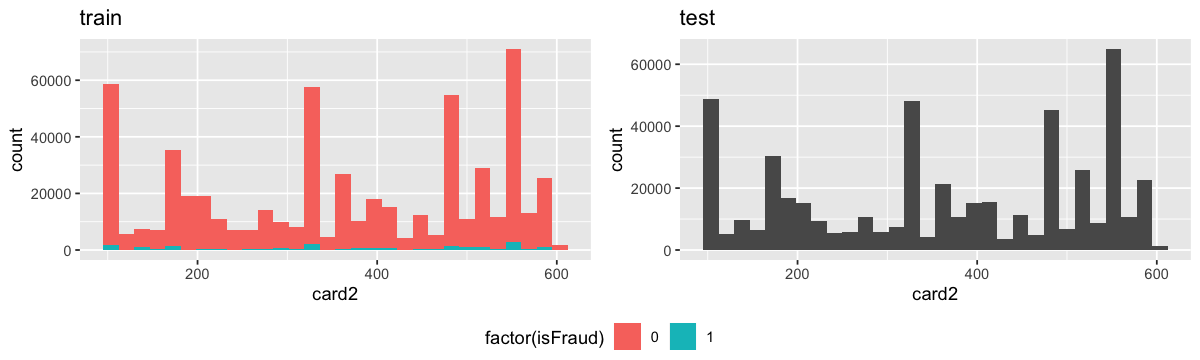

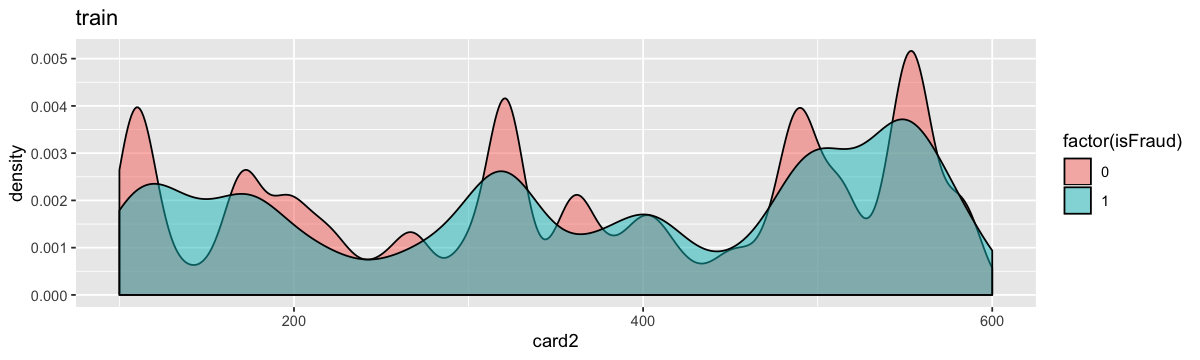

In [4]:
n_distinct(tr$card2)
n_distinct(te$card2)
summary(tr$card2)
summary(te$card2)

a1 <- ggplot(tr, aes(card2, fill = factor(isFraud))) + geom_histogram() + ggtitle("train") 
b1 <- ggplot(te, aes(card2)) + geom_histogram() + ggtitle("test")

options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

c1 <- ggplot(tr, aes(card2, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("train") 
c1

- card1과 비슷하게 데이터 분포에서 특정 구간에서 높은 밀도를 가지는 경향이 있으며, card2에서는 이 경우 모두 fraud=0의 비율이 높아졌음

In [6]:
na_card2 <- tr[is.na(card2)]
nrow(na_card2) / nrow(tr)
prop.table(table(na_card2$isFraud))

[1] 0.01512683


         0          1 
0.95264749 0.04735251 

- 약 1.5%의 NA 값들은 4.7%로 상대적으로 높은 fraud rate

### card3

[1] 115

[1] 116

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  100.0   150.0   150.0   153.2   150.0   231.0    1565 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  100.0   150.0   150.0   153.5   150.0   232.0    3002 

Warning message:
“Removed 1565 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1565 rows containing non-finite values (stat_bin).”Warning message:
“Removed 3002 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1565 rows containing non-finite values (stat_density).”

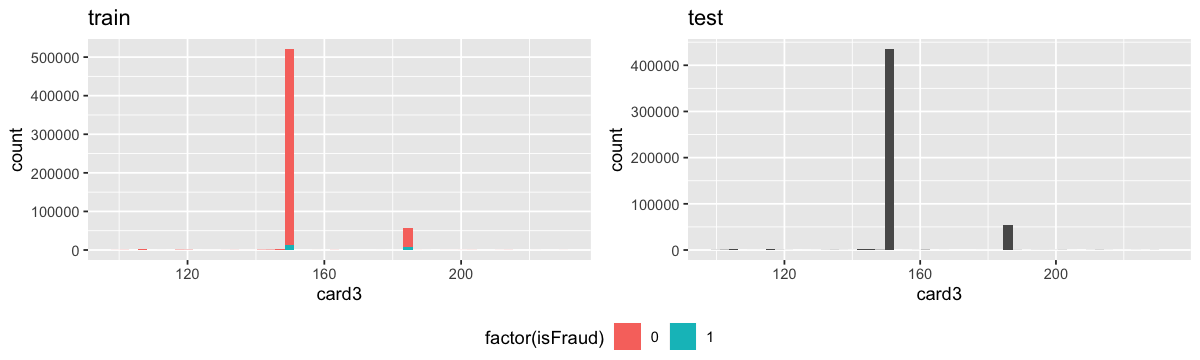

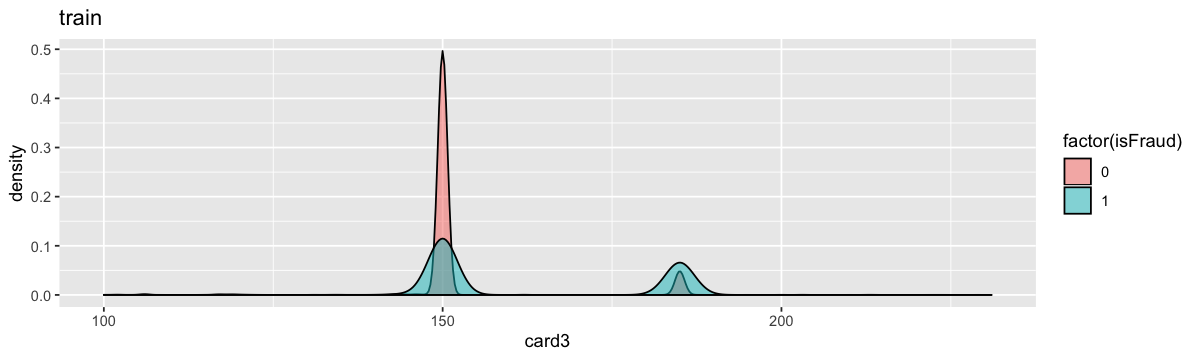

In [7]:
n_distinct(tr$card3)
n_distinct(te$card3)
summary(tr$card3)
summary(te$card3)

a1 <- ggplot(tr, aes(card3, fill = factor(isFraud))) + geom_histogram(bins = 50) + ggtitle("train") 
b1 <- ggplot(te, aes(card3)) + geom_histogram(bins = 50) + ggtitle("test")

options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

c1 <- ggplot(tr, aes(card3, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("train") 
c1

In [8]:
card3_rat <- tr[, .(cnt = .N,
                   prop = mean(isFraud)),
              by = card3 ]
head(card3_rat[order(-cnt)], 5)

card3,cnt,prop
<dbl>,<int>,<dbl>
150,521287,0.02456804
185,56346,0.13065701
106,1571,0.01527689
NA,1565,0.02492013
144,1252,0.08945687


- 150, 185의 값이 전체의 98를 차지했으며,150이 아닐때, 185일때 fraud rate는 거의 11%, 13%에 육박했다..
 -> 150, 185로 구별을 짓는 feature를 추가
- na값이 test set에서 두배 이상(데이터 사이즈를 고려했을때 실제로는 3배정도) 많은 이유는?

### card4


                 american express         discover       mastercard 
            1577             8328             6651           189217 
            visa 
          384767 

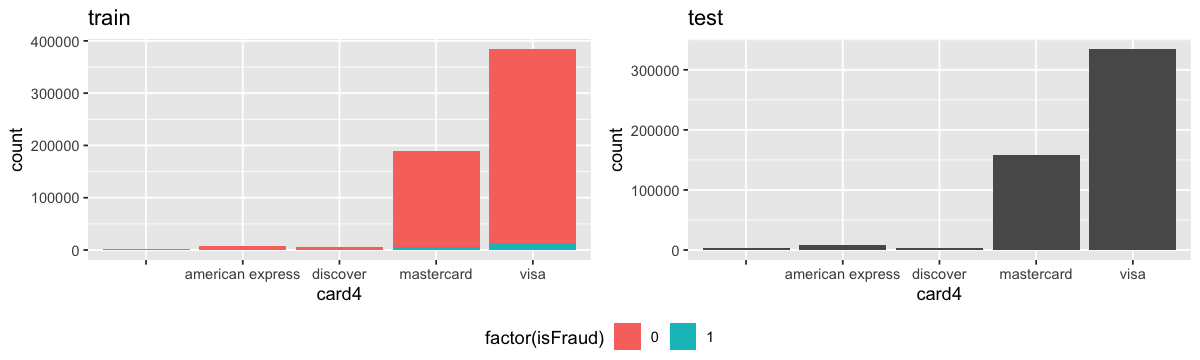

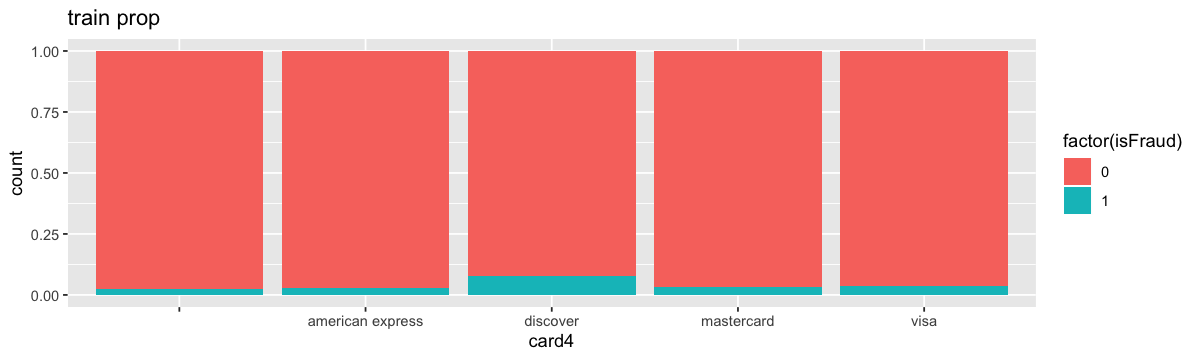

In [9]:
table(tr$card4)

a1 <- ggplot(tr, aes(card4, fill = factor(isFraud))) + geom_bar() + ggtitle("train") 
b1 <- ggplot(te, aes(card4)) + geom_bar() + ggtitle("test")

options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

a1 <- ggplot(tr, aes(card4, fill = factor(isFraud))) + geom_bar(position = 'fill') + ggtitle("train prop")
a1

- discover type의 경우 fraud ratio 비율이 높았으나, 전체 데이터 중 차지하는 비중은 약 1% 정도 내외로 미비한 편

### card5

[1] 120

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  100.0   166.0   226.0   199.3   226.0   237.0    4259 

[1] 103

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  100.0   166.0   226.0   200.2   226.0   237.0    4547 

Warning message:
“Removed 4259 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4259 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4547 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4259 rows containing non-finite values (stat_density).”

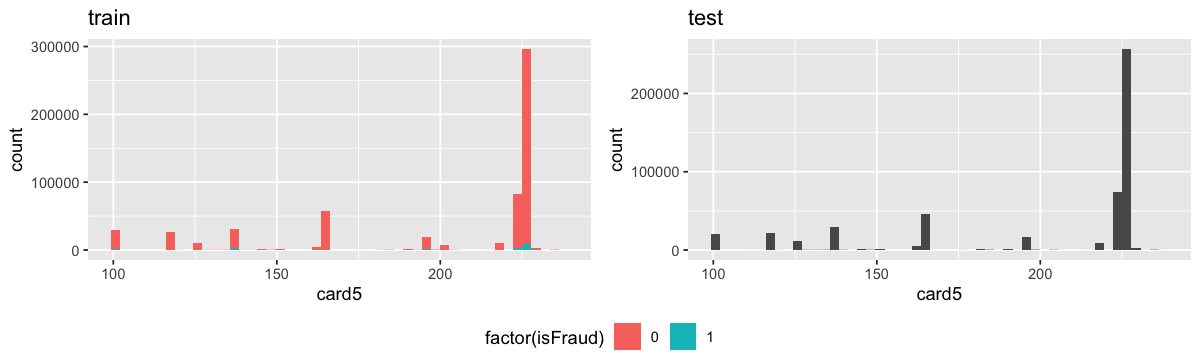

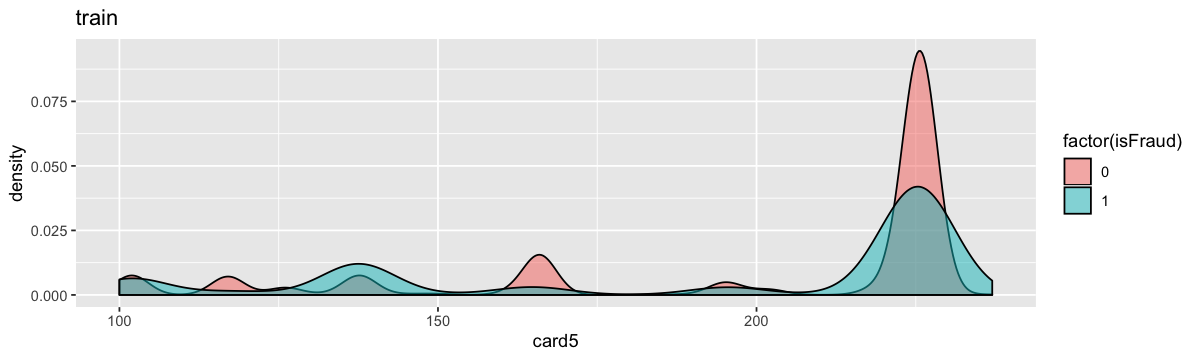

In [10]:
n_distinct(tr$card5)
summary(tr$card5)
n_distinct(te$card5)
summary(te$card5)


a1 <- ggplot(tr, aes(card5, fill = factor(isFraud))) + geom_histogram(bins = 50) + ggtitle("train") 
b1 <- ggplot(te, aes(card5)) + geom_histogram(bins = 50) + ggtitle("test")

options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

c1 <- ggplot(tr, aes(card5, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("train") 
c1



In [11]:
card5_rat <- tr[, .(cnt = .N,
                   prop = mean(isFraud)),
              by = card5 ]
head(card5_rat[order(-cnt)], 10)

card5_rat <- te[, .(cnt = .N
                  ),
              by = card5 ]
head(card5_rat[order(-cnt)], 10)


card5,cnt,prop
<dbl>,<int>,<dbl>
226,296546,0.02951650
224,81513,0.03866868
166,57140,0.01102555
102,29105,0.06294451
117,25941,0.01364635
138,19737,0.08522065
195,16945,0.04018885
137,11720,0.14718430
126,10298,0.01019615


card5,cnt
<dbl>,<int>
226,256991
224,71596
166,45790
138,22102
117,21120
102,20386
195,14951
126,11439
219,8402


- test 데이터에는 없은 약 20개정도의 unique value들이 존재함 -> 확인 필요(5.1)
- card3와 마찬가지로 상위 유형들, 특히 fraud ratio가 높은 value들을 따로 컬럼으로 만들어줄 필요성!

#### 5.1 checking

In [12]:
li = setdiff(tr$card5, te$card5)
ex  <- tr[card5 %in% li]
ex <- ex[, .(cnt = .N,
                   prop = mean(isFraud)),
              by = card5 ]
head(ex, 5)

card5,cnt,prop
<dbl>,<int>,<dbl>
202,7103,0.008165564
171,8,0.000000000
182,30,0.000000000
140,2,0.000000000
173,1,0.000000000


- train 데이터에만 존재하는 값들은 fraud 가 0에 가까운 값임 -> 약 7200개 데이터 삭제  
- 만약 card5가 카드 상품이고, 시간의 흐름에 따라 카드 폐지/이벤트 등의 특정 이벤트가 발생할 가능성은?? Top 20 을 중심으로 추가 분석 진행(5.2)

### card6


                    charge card          credit           debit debit or credit 
           1571              15          148986          439938              30 

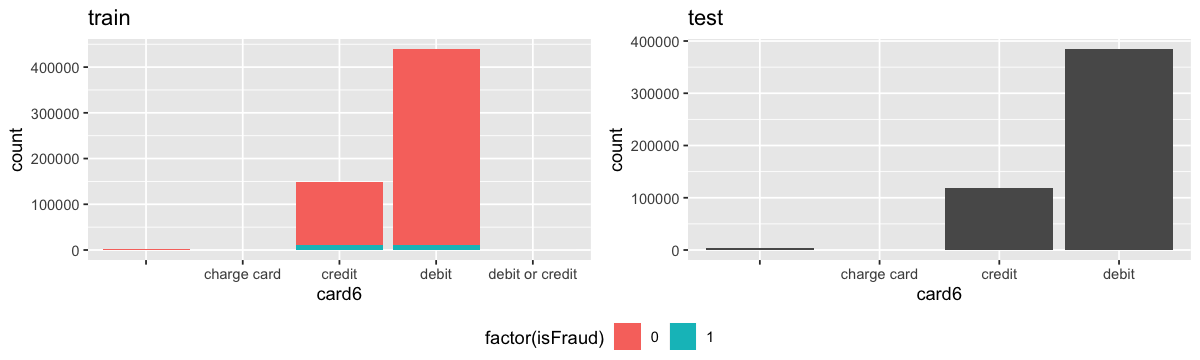

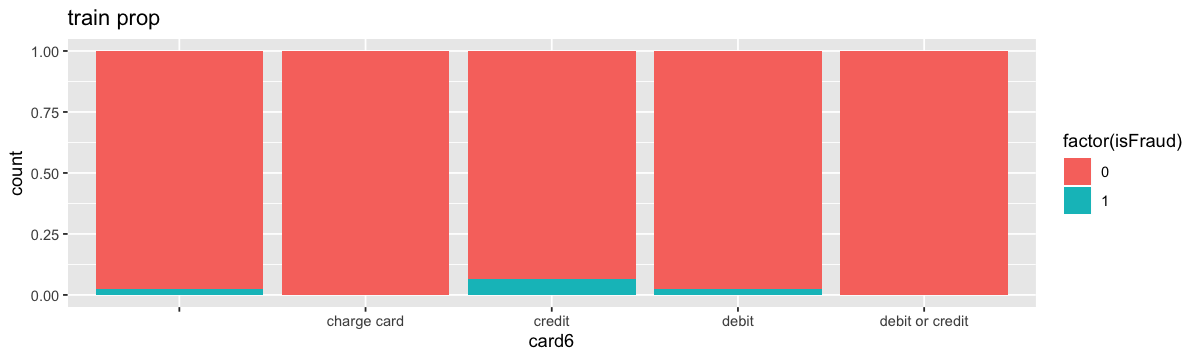

In [14]:
table(tr$card6)

a1 <- ggplot(tr, aes(card6, fill = factor(isFraud))) + geom_bar() + ggtitle("train") 
b1 <- ggplot(te, aes(card6)) + geom_bar() + ggtitle("test")

options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

a1 <- ggplot(tr, aes(card6, fill = factor(isFraud))) + geom_bar(position = 'fill') + ggtitle("train prop")
a1

### card1 versus card3

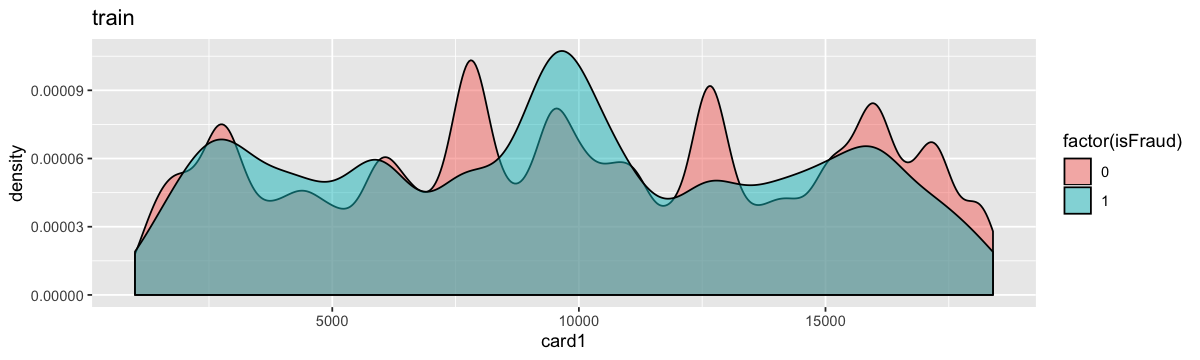

In [15]:
# 기존 분포
c1 <- ggplot(tr, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("train") 
c1

[1] 67688

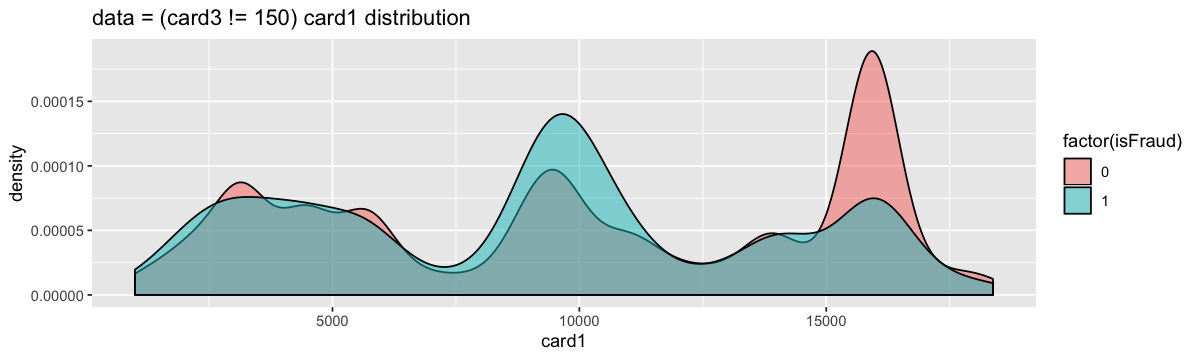

[1] 56346

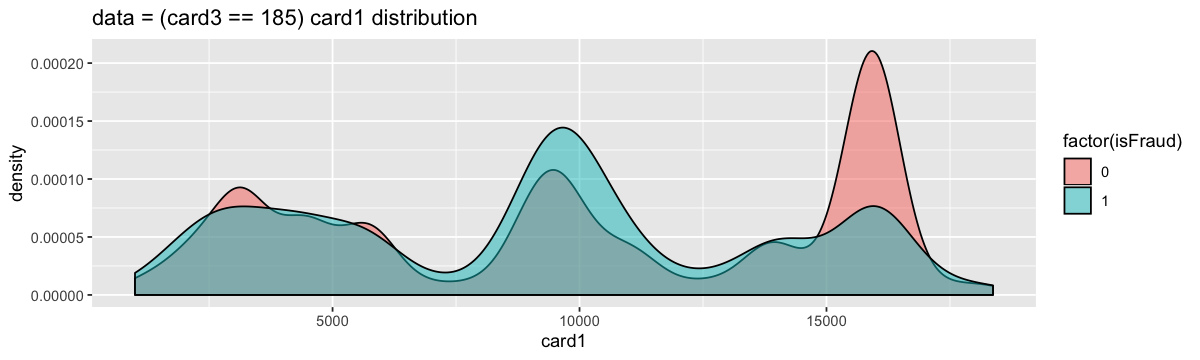

[1] 11342

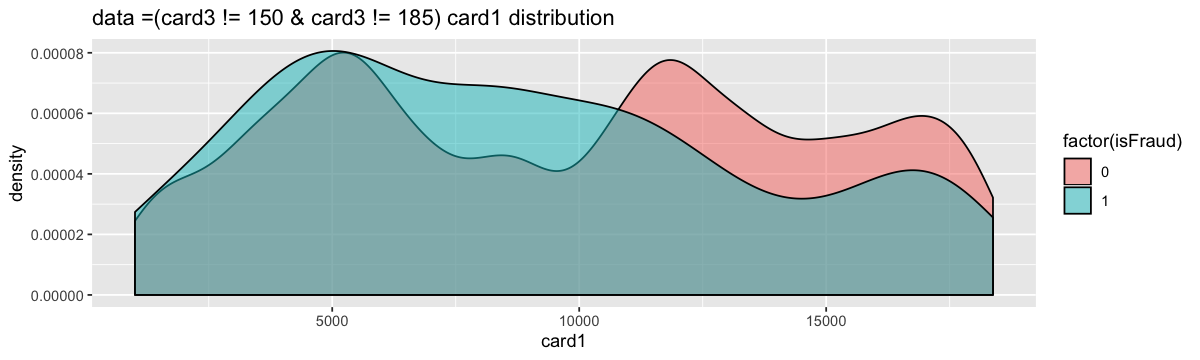

In [16]:
ex  <- tr[card3!=150]
c1 <- ggplot(ex, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("data = (card3 != 150) card1 distribution") 
c1
nrow(ex)

ex  <- tr[card3==185]
c1 <- ggplot(ex, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("data = (card3 == 185) card1 distribution") 
c1
nrow(ex)

ex  <- tr[card3!=150 & card3!=185]
c1 <- ggplot(ex, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("data =(card3 != 150 & card3 != 185) card1 distribution") 
c1
nrow(ex)

- card!= 150(card==185) 의 데이터에서 card의 분포를 보면 기존 7500, 12500에서 보이는 fraud == 0의 돌출 부분이 없는것을 확인할 수 있다.
- 또한 150, 185를 제외한 나머지 값들만으로 분포를 그려본 결과 lightgbm이 아주 좋아할만한 그래프 형태로 나뉘어졌다.(비록 데이터는 2%정도밖에 해당이 안되지만..)

### card1 vesus card5

[1] 296546

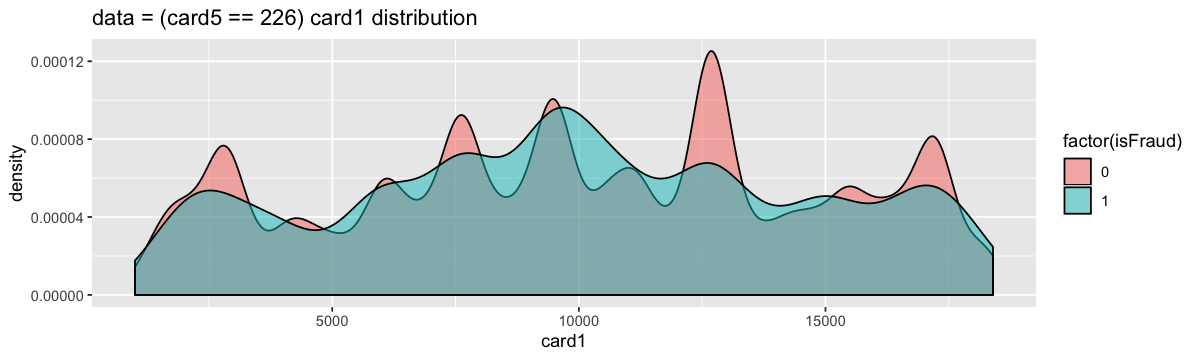

[1] 81513

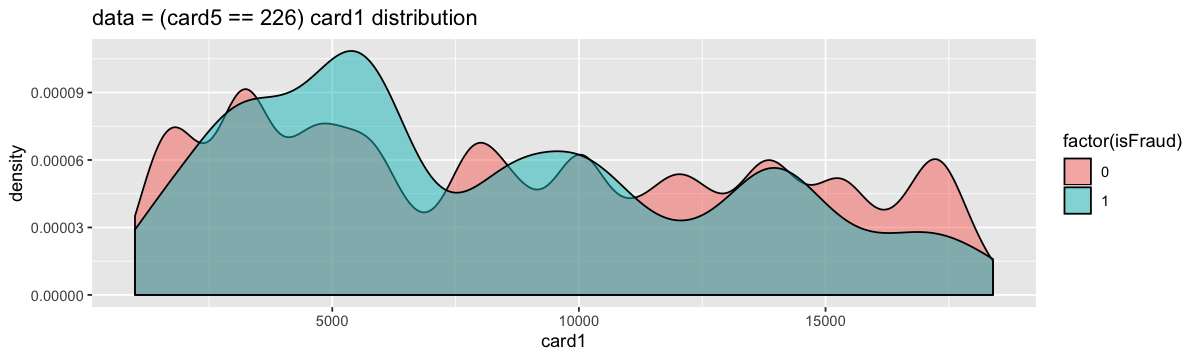

[1] 29105

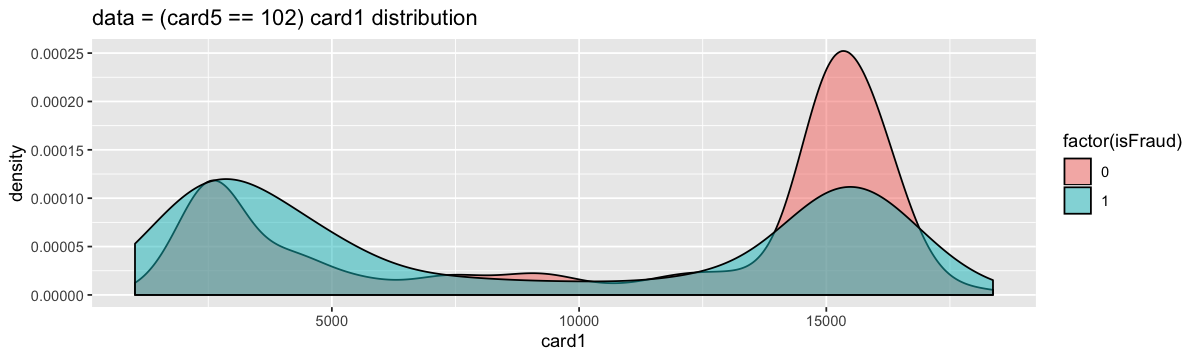

[1] 11720

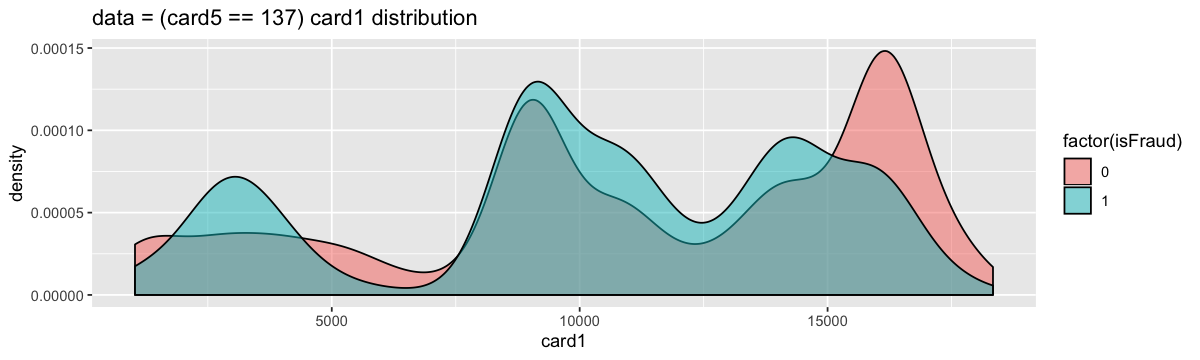

In [17]:
ex  <- tr[card5==226]
c1 <- ggplot(ex, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("data = (card5 == 226) card1 distribution") 
c1
nrow(ex)

ex  <- tr[card5==224]
c1 <- ggplot(ex, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("data = (card5 == 226) card1 distribution") 
c1
nrow(ex)

ex  <- tr[card5==102]
c1 <- ggplot(ex, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("data = (card5 == 102) card1 distribution") 
c1
nrow(ex)

ex  <- tr[card5==137]
c1 <- ggplot(ex, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + ggtitle("data = (card5 == 137) card1 distribution") 
c1
nrow(ex)

- interesting!! top card5 별로 card1의 분포를 본 결과 분포들이 저마다 제각각이다??
- card1을 quantile feature로 나누어서 계산하는것도 고려할 것(물론 card1이 numerical value라는 전제하에..)

### card1 versus card4

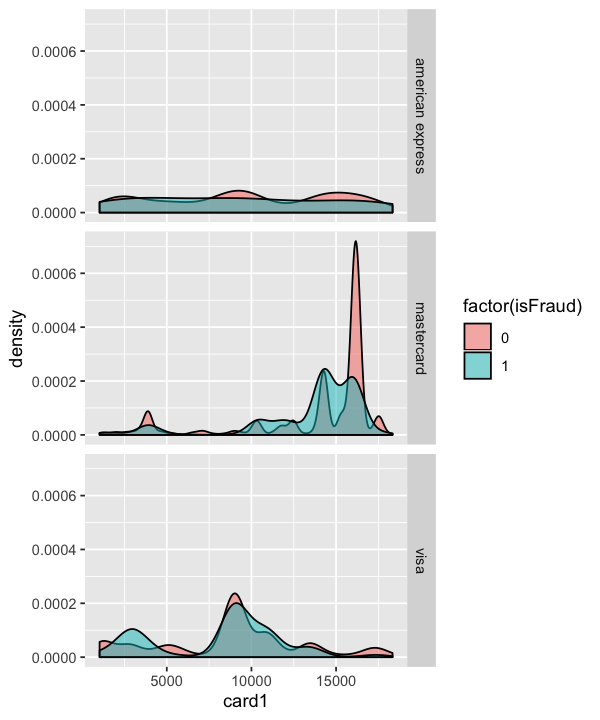

In [18]:
options(repr.plot.width = 5, repr.plot.height = 6)
ggplot(ex, aes(card1, fill = factor(isFraud))) + geom_density(alpha = 0.5) + facet_grid(rows = vars(card4))

mastercard/visa 간 분포가 극명하게 다르다..? 

#### <현재까지의 분석으로 추측하는 card1 변수의 의미>
- 가설 1) card1이 결제 금액(전달 사용량, 카드 한도 등등) 관련 변수일 가능성?
- 가설 2) id를 나타내는 변수? 카드 이용자 또는 카드 이용자 + 카드 의 조합?

### 가설 1) card1이 결제 금액(전달 사용량, 카드 한도 등등) 관련 변수일 가능성?
만약 이 가설이 맞다면 card1은 결제 금액(transactionAMT) 와 상관관계를 보여야 할것임

In [20]:
cor.test(tr$TransactionAmt, tr$card1)


	Pearson's product-moment correlation

data:  tr$TransactionAmt and tr$card1
t = -4.3993, df = 590538, p-value = 0.00001086
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.008275086 -0.003174273
sample estimates:
         cor 
-0.005724717 


상관관계는 0이므로 가격과는 관계가 없는 변수임을 알 수 있다.  
또한 card1이 가격 관련된 변수라고 하더라도 카드 결제사별(master, visa)로 가격결제 분포가 다르다는것은 납득하기 힘들다(위의 card1-card4 연관 그래프 참조)

### 가설 2) id를 나타내는 변수? 카드 이용자 또는 카드 이용자 + 카드 의 조합?

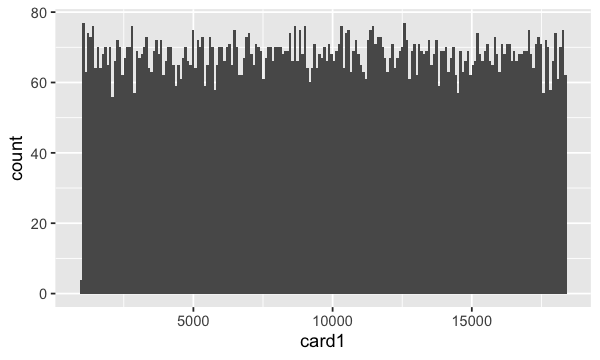

In [22]:
 ex <- tr[!duplicated(tr$card1)]
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(ex, aes(card1)) + geom_histogram(bins = 200)

unique 값을 제외하고 histogram을 그린 결과 비교적 고른 분포를 보였다.  
위 가설이 맞다면, unique한 card1 아이디는 같은 card3,card4, card6 등의 값을 가져야하는데..

In [23]:
ex <- tr[, .N, by= card1]
ex <- ex[order(-N)]
head(ex)


id1 <- tr[card1==12695]
nrow(id1)

table(id1$card2)
table(id1$card3)
table(id1$card4)
table(id1$card5)
table(id1$card6)

card1,N
<int>,<int>
7919,14932
9500,14162
15885,10361
17188,10344
15066,7945
12695,7091


[1] 7091


 490 
7079 


 150 
7079 


     visa 
  12 7079 


 226 
7079 


      debit 
   12  7079 

놀랍게도 모두 하나의 값들(일부 NA값들을 제외하면) 나타냈다!!  
**즉, Card1은 사용자 or 사용자+카드상품 을 나태내는 변수이다.**
 -> card1을 aggeration을 통해 여러 feature들을 만들어내자

### 결론
- variable별 의미 파악
    - card1 : 카드 사용자 or 카드 사용자 + 카드 종류 조합
    - card2 : 카드 종류(추정)
    - card3 : issue bank or country(description 참고)
    - card4 : 카드 결제사(master/visa)
    - card5 : issue bank or country(description 참고)
    - card6 : 카드 종류(신용/직불카드 등)

### 향후 계획
- card1을 활용한 feature engineering( value coutns, aggeration 등등)
- card variable과 C, D, V, timestamp, transactionAMT 등과의 연관 분석